# Local Search

The second phase in GRASP involves local search.  This is an entire topic on its own!  Here we will keep things simple and look at basic local search using a **hill-climbing** approach

Hill climbers are very simple algorithms that iteratively test neighbouring solutions to see if they find any improvement. This local search approach is often very successful at finding reasonably good solutions to a routing and scheduling problem. 

The major drawback is that hill climbers suffer from getting stuck in a **local optimum** and you can often do better by employing a more sophisticated algorithm.

However, you might be surprised at how useful hill-climbers turn out to be when used in combination with other approaches in a multi-start algorithm like GRASP. One of the key benefits of hill climbers is that they are relatively fast (because they are simple). You can even set a time limit to get some of the benefit of local search without greatly extending the execution time of your algorithm.

> Although this the approach is called Hill-Climbing in the TSP you are descending a hill to the find the shortest route. The algorithm is the same, but you are maximising -1*objective (or alternatively $\dfrac{1}{objective}$).



## Imports

In [1]:
import numpy as np
import sys

## `metapy` imports

In [2]:
# install metapy if running in Google Colab
if 'google.colab' in sys.modules:
    !pip install meta-py

In [3]:
from metapy.tsp import tsp_io as io
from metapy.tsp.euclidean import gen_matrix, plot_tour

from metapy.tsp.objective import OptimisedSimpleTSPObjective

from metapy.local_search.hill_climbing import (HillClimber,
                                               TweakTwoOpt, 
                                               SimpleTweak)

## Load data and generate cost matrix

In [4]:
#load file
file_path = 'https://raw.githubusercontent.com/TomMonks/meta-py/main/data/st70.tsp'

#number of rows in the file that are meta_data
md_rows = 6

#read the coordinates
cities = io.read_coordinates(file_path, md_rows)
matrix = gen_matrix(cities, as_integer=True)

## TWEAKS: Simple versus 2-Opt

Hill-Climbing works by iteratively tweaking a solution to search for better neighbouring solutions. `metapy` provides two relatively straightforward tweak operators. `SimpleTweak` swaps the position of two cities at a time while `TweakTwoOpt` reverses a section of the route between two cities. Generally speaking `TweakTwoOpt` will produce better solution

In [5]:
tour = np.arange(10)
tweaker1 = SimpleTweak()
tweaker1.tweak(tour, 5, 9)
tour

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 5])

In [6]:
tour = np.arange(10)
tweaker2 = TweakTwoOpt()
tweaker2.tweak(tour, 1, 4)
tour

array([0, 3, 2, 1, 4, 5, 6, 7, 8, 9])

## Example local search


** Hill Climber First Improvement OUTPUT ***
best cost:	-838.0
best solutions:
[63 64 55 10 47 66 53 32 11 59 51  9  4 52  5 40 42 16 20 33 61 38 60 39
 44 24 45 26 67 43 29 19 13 27  7 25 48 54 18  1  6 31  2 41 17  3 23 14
 56 34 68 30 69 12 28 35  0 15 50 49 57 36 46 22 37 58 21 62 65  8]


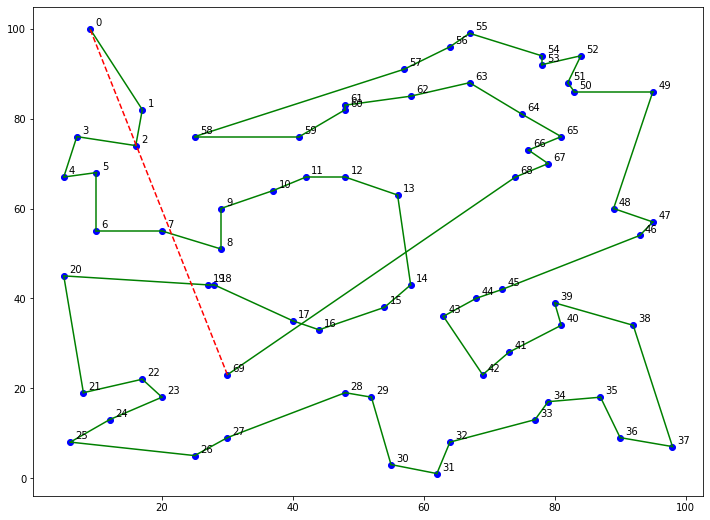

In [7]:
# Basic First Improvement Hill Climber

# create a tour (full 70 cities)
tour = np.arange(70)
rng = np.random.default_rng(42)

# random init solution (operation in place)
rng.shuffle(tour)

# create TSP objective (negate costs)
objective = OptimisedSimpleTSPObjective(-matrix)

# create Hill climbing algorithm
solver = HillClimber(objective=objective, 
                     init_solution=tour, 
                     tweaker=TweakTwoOpt())

# run the local search
solver.solve()

# output results
print("\n** Hill Climber First Improvement OUTPUT ***")
print("best cost:\t{0}".format(solver.best_cost))
print("best solutions:")
print(solver.best_solutions[0])
fig, ax = plot_tour(solver.best_solutions[0], cities, figsize=(12,9))